In [ ]:
!wget https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip

--2023-04-15 01:46:18--  https://bitbucket.org/ishaanjav/code-and-deploy-custom-tensorflow-lite-model/raw/a4febbfee178324b2083e322cdead7465d6fdf95/fruits.zip
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::6b17:d1f5, 2406:da00:ff00::22c5:2ef4, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105946856 (101M) [application/zip]
Saving to: ‘fruits.zip’

fruits.zip          100%[===================>] 101.04M  28.7MB/s    in 4.4s    

2023-04-15 01:46:26 (23.0 MB/s) - ‘fruits.zip’ saved [105946856/105946856]



In [ ]:
#upzip the file
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits/
  inflating: __MACOSX/._fruits       
  inflating: fruits/.DS_Store        
  inflating: __MACOSX/fruits/._.DS_Store  
   creating: fruits/test/
   creating: fruits/train/
   creating: fruits/validation/
   creating: fruits/test/apple/
  inflating: fruits/test/.DS_Store   
  inflating: __MACOSX/fruits/test/._.DS_Store  
   creating: fruits/test/banana/
   creating: fruits/test/orange/
   creating: fruits/train/apple/
  inflating: fruits/train/.DS_Store  
  inflating: __MACOSX/fruits/train/._.DS_Store  
   creating: fruits/train/banana/
   creating: fruits/train/orange/
   creating: fruits/validation/apple/
  inflating: fruits/validation/.DS_Store  
  inflating: __MACOSX/fruits/validation/._.DS_Store  
   creating: fruits/validation/banana/
   creating: fruits/validation/orange/
  inflating: fruits/test/apple/Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflating: __MACOSX/fruits/test/apple/._Screen Shot 2018-06-08 at 5.27.19 PM.png  
  inflatin

In [ ]:
import tensorflow as tf
#Allow us to view the images inside our actual notebook
import matplotlib.pyplot as plt

In [ ]:
#The machine learning model is going to train on our training data set while it is training on these images. 
#We are going to evaluate it on our validation set
#Finally evaluate on the test set 

# Resize all of the images into 32 x 32
img_height, img_width = 32, 32
batch_size = 20

#Create a varible to load these images that we can use for training our models
train_ds = tf.keras.utils.image_dataset_from_directory(
    #Provide a path to training folder
    "fruits/train",
    image_size = (img_height, img_width),
    #How many images that the system will train on before it updates its parameters
    batch_size = batch_size
)

#Validation set
val_ds = tf.keras.utils.image_dataset_from_directory(
    #Provide a path to training folder
    "fruits/validation",
    image_size = (img_height, img_width),
    #How many images that the system will train on before it updates its parameters
    batch_size = batch_size
)

#Test set
test_ds = tf.keras.utils.image_dataset_from_directory(
    #Provide a path to training folder
    "fruits/test",
    image_size = (img_height, img_width),
    #How many images that the system will train on before it updates its parameters
    batch_size = batch_size
)


Found 460 files belonging to 3 classes.
Found 66 files belonging to 3 classes.
Found 130 files belonging to 3 classes.


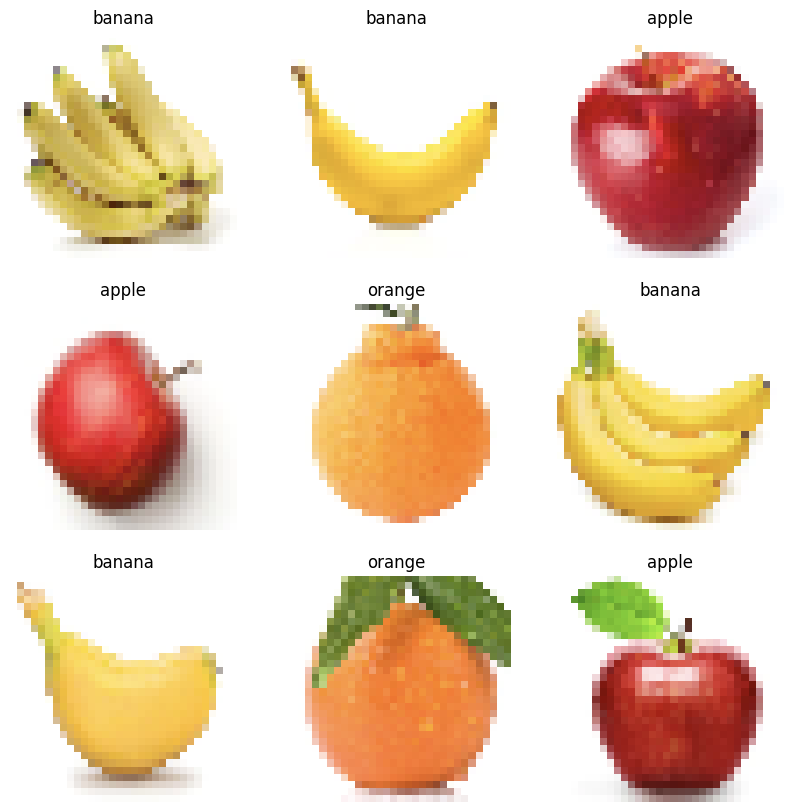

In [ ]:
#Create an array for class names
class_names = ["apple", "banana", "orange"]

#Create a figure
plt.figure(figsize=(10,10))

#Iterate over some images, a list of images and corresponding labels
for images, labels in train_ds.take(1):
  #Display them in 3 by 3 grid
  for i in range (9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
#Create model

#Add layers to the neural network
model = tf.keras.Sequential(
    [
        #Rescale to be 0-1 -> Small range of values for the network
        tf.keras.layers.Rescaling(1./255),
        #Convolutional layers
        tf.keras.layers.Conv2D(32,3, activation="relu"),
        #Take the lastest pixel values in 2 x 2 Max-pool
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32,3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        #Flattened out all of these inputs - Flattened layer
        tf.keras.layers.Flatten(),
        #Flatten it all out have a dense layer with 128 neurons
        tf.keras.layers.Dense(128, activation="relu"),
        #3 neural network
        tf.keras.layers.Dense(3),
    ]
)

In [ ]:
#Compile model
model.compile(
    #Adam optimizer - try to minimize a loss function
    optimizer="adam",
    #Computing this loss after every iteration over our data set 
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    #Receive the accuracy
    metrics=['accuracy']
)

In [ ]:
#Fit function to train it
model.fit(
    train_ds,
    validation_data=val_ds,
    #Go over this whole data set 10 times and learn from those images
    epochs=10
)

Epoch 1/10
23/23 [==============================] - 4s 89ms/step - loss: 0.9407 - accuracy: 0.4957 - val_loss: 0.7285 - val_accuracy: 0.6515
Epoch 2/10
23/23 [==============================] - 2s 80ms/step - loss: 0.6292 - accuracy: 0.6913 - val_loss: 0.4989 - val_accuracy: 0.7727
Epoch 3/10
23/23 [==============================] - 3s 125ms/step - loss: 0.3907 - accuracy: 0.8522 - val_loss: 0.3258 - val_accuracy: 0.9242
Epoch 4/10
23/23 [==============================] - 2s 79ms/step - loss: 0.2593 - accuracy: 0.8935 - val_loss: 0.2583 - val_accuracy: 0.8939
Epoch 5/10
23/23 [==============================] - 2s 79ms/step - loss: 0.1786 - accuracy: 0.9457 - val_loss: 0.2637 - val_accuracy: 0.9242
Epoch 6/10
23/23 [==============================] - 2s 76ms/step - loss: 0.1369 - accuracy: 0.9609 - val_loss: 0.2432 - val_accuracy: 0.9242
Epoch 7/10
23/23 [==============================] - 3s 113ms/step - loss: 0.1787 - accuracy: 0.9457 - val_loss: 0.2276 - val_accuracy: 0.9394
Epoch 8/10


In [ ]:
#Evaluate convolutional neural network on the test set
model.evaluate(test_ds)

7/7 [==============================] - 0s 11ms/step - loss: 0.2274 - accuracy: 0.9462


[0.22739192843437195, 0.9461538195610046]

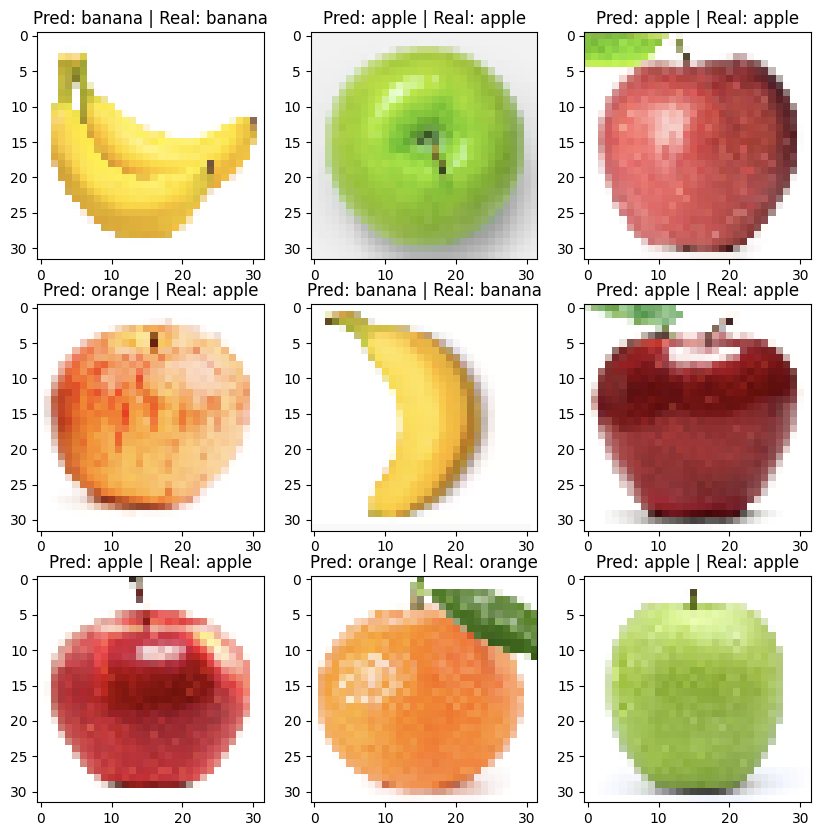

In [ ]:
#Make predications on images and receive those predictions
import numpy

plt.figure(figsize=(10,10))
#Take 1 batch from the test data set and get the image and labels from the test data
for images, labels in test_ds.take(1):
  #Get prediction and pass in the list of images
  classifications = model(images)
  #print(classifications)
#Predict result likelihood
#[[apple    banana    orange]]
#The index with the largest numnber is the model thinks that image is

  for i in range (9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #argmax -> give us the biggest number
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
#Convert the neural network variable into a tensorflow model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

#Save it in python to write it to a file, download and deploy in android studio
with open("model.tflite", 'wb') as f:
  f.write(tflite_model)